<a href="https://colab.research.google.com/github/PauCaBu/fluffy_CNN/blob/main/CNN_with_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
# Flatten : transforms it to 1D array
# Dropout : random operation that turns off the neurons to avoid overfitting in the data

from keras.utils import to_categorical
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input

In [15]:
K.set_image_data_format('channels_last')

In [2]:
def tvscale(img, plot_size):
  plt.rcParams['figure.figsize'] = plot_size
  imgplot = plt.imshow(img, interpolation='none', cmap='gray')
  plt.axis('off')
  plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

X1 = np.load('cosmo-early.npy')
X2 = np.load('cosmo-late.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


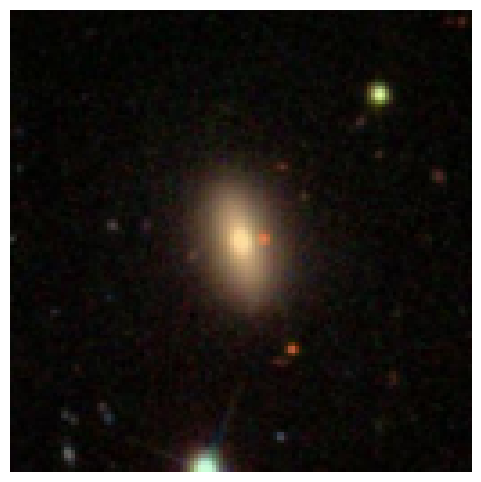

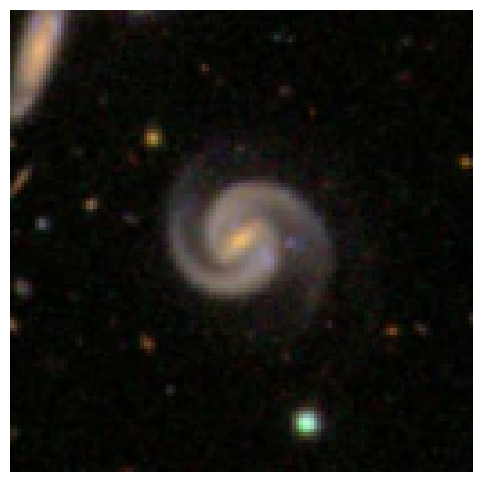

In [7]:
tvscale(X1[0], plot_size = [6,6])
tvscale(X2[0], plot_size = [12,6])


In [16]:
X = np.concatenate((X1, X2), axis = 0)
#X = X.astype(np.float32)/256.0

Y = np.zeros((X.shape[0]))
Y[0:len(X1)] = 1

rand_ind = np.arange(0, X.shape[0])
np.random.shuffle(rand_ind)

X = X[rand_ind]
Y = Y[rand_ind]

n_classes = 2
Y = to_categorical(Y, num_classes=n_classes)

In [17]:
X_train = X[50:]
Y_train = Y[50:]
X_test = X[0:50]
Y_test = Y[0:50]

In [19]:
#input_img = Input(shape = (128,128,3))

model = VGG16(weights= 'imagenet', include_top=False, input_shape = (128,128,3))

for layer in model.layers:
  layer.trainable = False

x = model.get_layer('block4_conv3').output
x = GlobalAveragePooling2D()(x)

# ----- Agregator

x = Flatten()(x) # Transform it to a 1D vector
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)

out = Dense(n_classes, activation = 'softmax')(x)
model = Model(inputs=model.input, outputs=out)
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [26]:
input_img = Input(shape = (128,128,3))

# ---- feature extractor
x = Conv2D(filters=16, kernel_size=(3,3), strides = (1,1), padding = 'same', activation ='relu')(input_img)
x = MaxPooling2D((2,2), padding = 'same', name='MP1')(x)
x = Conv2D(filters=32, kernel_size=(3,3), strides = (1,1), padding = 'same', activation ='relu')(x)
x = MaxPooling2D((2,2), padding = 'same', name='MP2')(x)
x = Conv2D(filters=64, kernel_size=(3,3), strides = (1,1), padding = 'same', activation ='relu')(x)
x = MaxPooling2D((2,2), padding = 'same', name='MP3')(x)

# ----- Agregator

x = Flatten()(x) # Transform it to a 1D vector
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)

out = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs=input_img, outputs=out)
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 MP1 (MaxPooling2D)          (None, 64, 64, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 MP2 (MaxPooling2D)          (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 MP3 (MaxPooling2D)          (None, 16, 16, 64)        0   

In [20]:


history = model.fit(preprocess_input(X_train), Y_train, batch_size=32, epochs=20, shuffle=True)

Epoch 1/20
18/18 [==============================] - 7s 77ms/step - loss: 1.6175 - accuracy: 0.5254
Epoch 2/20
18/18 [==============================] - 1s 40ms/step - loss: 0.6854 - accuracy: 0.5870
Epoch 3/20
18/18 [==============================] - 1s 41ms/step - loss: 0.5122 - accuracy: 0.7246
Epoch 4/20
18/18 [==============================] - 1s 39ms/step - loss: 0.3667 - accuracy: 0.8062
Epoch 5/20
18/18 [==============================] - 1s 40ms/step - loss: 0.3082 - accuracy: 0.8406
Epoch 6/20
18/18 [==============================] - 1s 39ms/step - loss: 0.2476 - accuracy: 0.9149
Epoch 7/20
18/18 [==============================] - 1s 37ms/step - loss: 0.2508 - accuracy: 0.9076
Epoch 8/20
18/18 [==============================] - 1s 37ms/step - loss: 0.2172 - accuracy: 0.9130
Epoch 9/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1864 - accuracy: 0.9384
Epoch 10/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1700 - accuracy: 0.9312
Epoch 11/

2/2 [==============================] - 0s 45ms/step


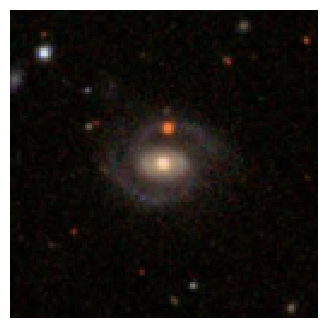

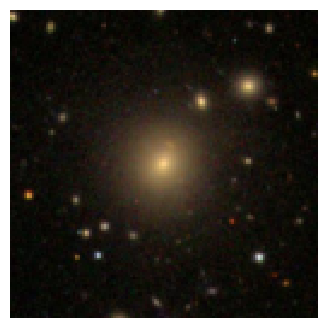

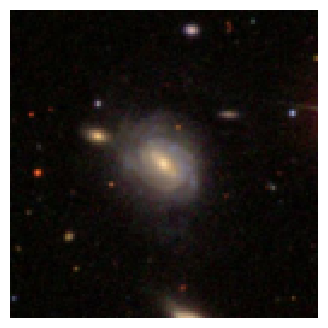

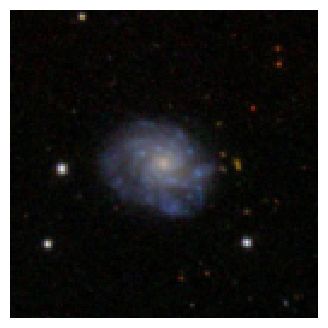

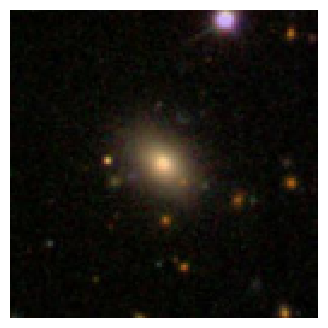

In [25]:
y_pred = np.round(model.predict(X_test))

early = np.where(y_pred == 0)[0]
late = np.where(y_pred == 1)[0]

for i in range(5):
  tvscale(X_test[early[i]], plot_size=[4,4])



In [22]:
y_pred

array([[6.2520364e-03, 9.9374795e-01],
       [5.9973609e-10, 1.0000000e+00],
       [2.5204328e-08, 1.0000000e+00],
       [1.0000000e+00, 2.0052527e-08],
       [1.2997011e-08, 1.0000000e+00],
       [7.1242181e-17, 1.0000000e+00],
       [1.2473459e-11, 1.0000000e+00],
       [2.1522063e-10, 1.0000000e+00],
       [9.9996996e-01, 3.0012658e-05],
       [6.6296148e-01, 3.3703858e-01],
       [1.0000000e+00, 2.3042783e-09],
       [9.9893075e-01, 1.0692170e-03],
       [3.6816697e-10, 1.0000000e+00],
       [3.6873498e-09, 1.0000000e+00],
       [1.0000000e+00, 4.4854395e-13],
       [2.2879904e-07, 9.9999976e-01],
       [9.9999976e-01, 2.3174853e-07],
       [3.3500925e-08, 1.0000000e+00],
       [2.3502092e-10, 1.0000000e+00],
       [1.0000000e+00, 5.8421462e-12],
       [1.0000000e+00, 5.7674466e-08],
       [7.0668240e-05, 9.9992931e-01],
       [1.2063794e-08, 1.0000000e+00],
       [1.3696312e-10, 1.0000000e+00],
       [1.2441548e-07, 9.9999988e-01],
       [1.0000000e+00, 7.

## Transfer learning
A very famous structure: VGG16